In [1]:
import pymc3 as pm
import numpy as np
import scipy as sp
import pandas as pd
import common
import matplotlib.pyplot as plt
import theano
plt.rcParams["font.size"] = 18
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
observed_xs, observed_ys,  real_xs, real_ys = common.generate_observed_dataset()
shared_xs = theano.shared(observed_xs)
shared_ys = theano.shared(observed_ys)

print(observed_xs.shape)
print(observed_ys.shape)
print(real_xs.shape)
print(real_ys.shape)

(40, 1)
(40,)
(200,)
(200,)


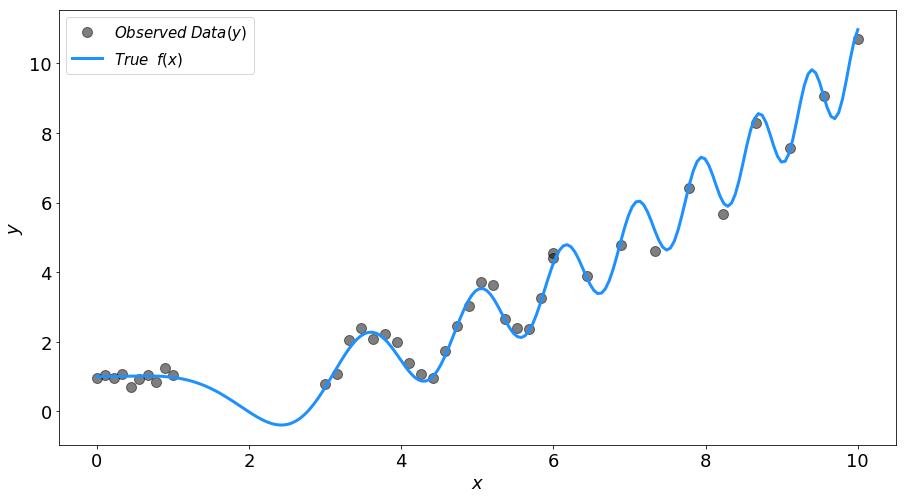

In [3]:
## Plot the data and the unobserved latent function
plt.figure(figsize=(15,8));
plt.plot(observed_xs, observed_ys, 'ok', ms=10, alpha=0.5, label="$Observed\;Data(y)$");
plt.plot(real_xs, real_ys, "dodgerblue", lw=3, label="$True\;\;f(x)$");
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(loc="best", fontsize=15);

In [4]:
with pm.Model() as model:
    ℓ = pm.Gamma("ℓ", alpha=2, beta=1)
    η = pm.HalfCauchy("η", beta=5)
    cov = η**2 * pm.gp.cov.Matern52(1, ℓ)
    
    gp = pm.gp.Latent(cov_func=cov)

    f = gp.prior("f", X=observed_xs)

    σ = pm.HalfCauchy("σ", beta=5)
    ν = pm.Gamma("ν", alpha=2, beta=0.1)
    y_ = pm.StudentT("y", mu=f, lam=1.0/σ, nu=ν, observed=observed_ys)

    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ν, σ, f_rotated_, η, ℓ]
Sampling 2 chains: 100%|██████████| 3000/3000 [02:18<00:00, 21.60draws/s]
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
T

In [5]:
pm.summary(trace)

/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
f_rotated___0,0.193462,0.087966,0.003621,0.054153,0.374829,192.141096,1.006531
f_rotated___1,0.055301,0.463733,0.011853,-0.954162,0.916850,1863.075770,0.999904
f_rotated___2,0.061095,0.866380,0.025502,-1.615321,1.837904,1021.453688,1.000331
f_rotated___3,0.065255,0.893933,0.019356,-1.560688,1.946954,2065.497005,1.000162
f_rotated___4,0.060595,0.954400,0.023746,-1.822427,1.977716,1343.138102,1.001159
f_rotated___5,0.057292,0.946988,0.023768,-1.729242,1.987536,1489.002595,1.003056
f_rotated___6,0.071785,0.932444,0.029992,-1.549206,2.064424,517.231769,1.000704
f_rotated___7,0.077102,0.934933,0.024084,-1.689232,1.949165,1356.349781,1.000108
f_rotated___8,0.124140,1.023447,0.030359,-1.861174,2.129982,817.997085,0.999547
f_rotated___9,0.026254,0.951834,0.024051,-1.799653,1.851680,1435.213981,0.999584


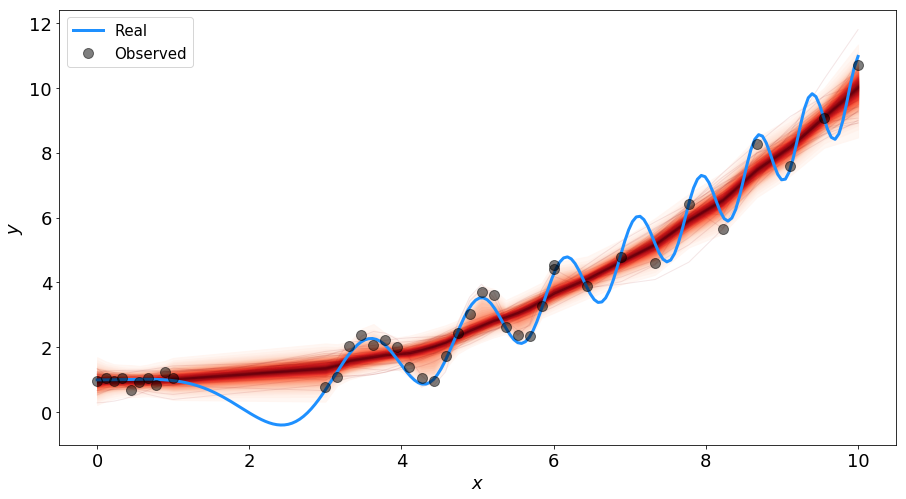

In [6]:
# plot the results
plt.figure(figsize=(15,8));

# plot the samples from the gp posterior with samples and shading
# fの事後確率を描画
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(plt, trace["f"], observed_xs);

# plot the data and the true latent function
plt.plot(real_xs, real_ys, "dodgerblue", lw=3, label="Real");
plt.plot(observed_xs, observed_ys, 'ok', ms=10, alpha=0.5, label="Observed");

# axis labels and title
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(loc="best", fontsize=15);

In [7]:
n_new = 200
X_new = np.linspace(0, 15, n_new)[:,None]

with model:
    f_pred = gp.conditional("f_pred", X_new)
    pred_samples = pm.sample_posterior_predictive(trace, vars=[f_pred], samples=1000)

100%|██████████| 1000/1000 [00:17<00:00, 56.40it/s]


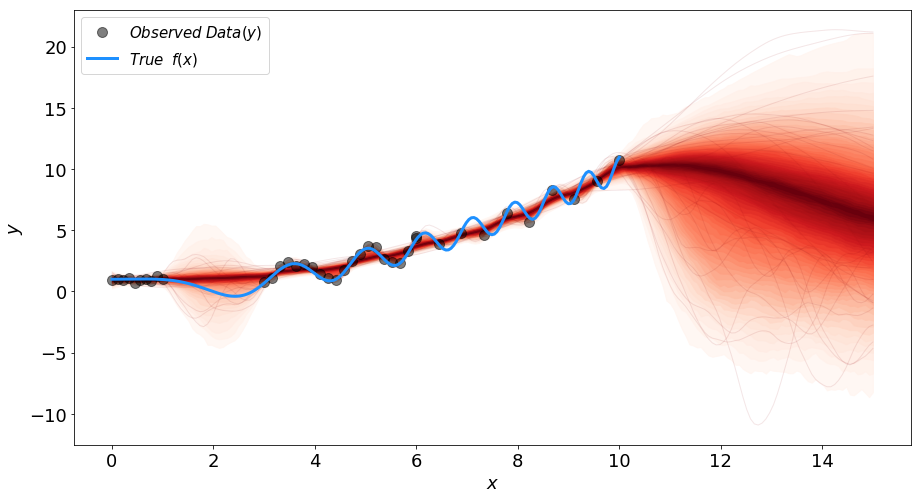

In [8]:
# plot the results
plt.figure(figsize=(15,8));
plot_gp_dist(plt, pred_samples["f_pred"], X_new)

plt.plot(observed_xs, observed_ys, 'ok', ms=10, alpha=0.5, label="$Observed\;Data(y)$");
plt.plot(real_xs, real_ys, "dodgerblue", lw=3, label="$True\;\;f(x)$");

plt.xlabel("$x$", fontsize=18) 
plt.ylabel("$y$", fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(loc="best", fontsize=15)

In [9]:
with model:
    pred_samples = pm.sample_posterior_predictive(trace, vars=[y_], samples=1000)

100%|██████████| 1000/1000 [00:00<00:00, 2289.51it/s]


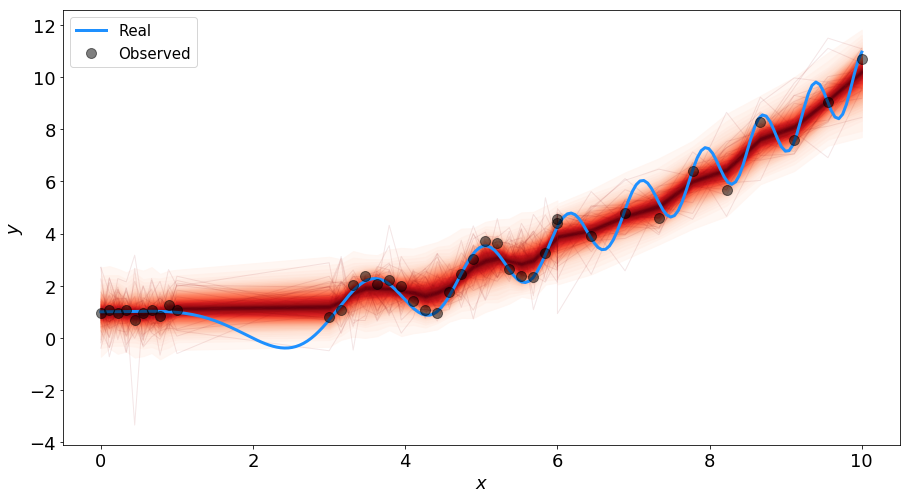

In [10]:
# plot the results
# pred_samples['y'].shape
plt.figure(figsize=(15,8));
plot_gp_dist(plt, pred_samples["y"], observed_xs);
plt.plot(real_xs, real_ys, "dodgerblue", lw=3, label="Real");
plt.plot(observed_xs, observed_ys, 'ok', ms=10, alpha=0.5, label="Observed")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(loc="best", fontsize=15)